# SVM A COMPLETE EXPLANATION

source : https://www.youtube.com/watch?v=efR1C6CvhmE
Note : Need to know Machine Learning Fundamental ,

Bias/ Variance, 

Cross Validation : Parameter to Decide how much Misclassification Allowed

TERMS :

Basic Idea : Classify Data into Two Groups

Hyperplane : Decision Boundary to Classify Data

Support Vectors : Data Points Closest to Hyperplane

Margin : Distance between Hyperplane and Support Vectors

Maximal Margin Classifier : Highest Possible Margin Values

Soft Margin : Margin that Allow some Misclassification Ignoring The Outlier

Kernel Trick : Function help move data to higher dimention without actually compute it.

Goal : Find the Maximal Margin Classifier and Using Kernel Trick to Handle Outlier

Lets start with data sets, suppose we have a data that is overweight or not, so above 90 is overweigth and below is not. in this example we already now how to separate the dataset. but in machine learning, we want to make sure the computer know the parameter of the devition, this is because we want to predict where the new data is. The computer must know how to classify data equally.

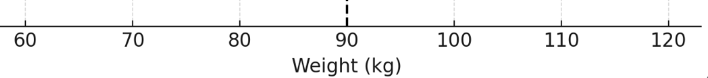

Now suppose we initiate the divition randomly at 83 kg. The data is divided and clssified. So when new input comes in if it below 93 will consider not over weight and if its above it it is. 

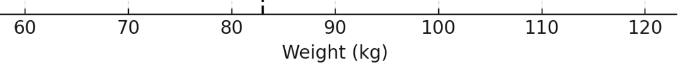

now what is another new input comes in 85? 

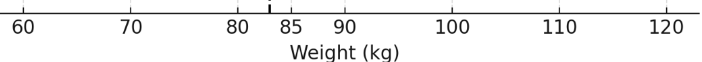

Obviously it will consider as overweight, but in reality it is not. its not overweight because the parameter is in 90kg, so under 90 isnt overweight

first ide in svm is to find the best parameter to divide the data equally. so when the new input comes in its not gonna misclussified.

The simple way is to look after the edge of each data points class and make the divition is in the middle of both.

The new concept comes in. Margin, margin is basically distance between edge of each data points class from the divition parameter. 

The goal in svm is getting the largest margin, it will classified the data in a balanced manner, boom, this is called Maximal Margin Classifier.

Okey, the maximal margin classifier is very sensitive to outlier, lets see this

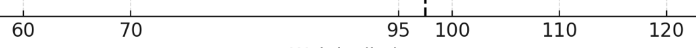



since maximal margin classifier is separated the distance between each data points class (Support Vectors) equally, if the majority of datasets in the left and just outlier in the 95, the divition isnt doing really good. what if we have new data that is in 93, it will be consider as underweight but in reality it is not. 

How to fix this?

just allow misclassification of the otlier. even if 95 or outlier is consider as underweight, we can just ignore it and make it as overweight. this is called a bias/variance TradeOff so the devition is same as before. 

When we allowed missclassifitaion, the margin called soft margin. Soft margin will take real support vectors of a class and ignore the outlier from another class even if its point is on the edge of that class

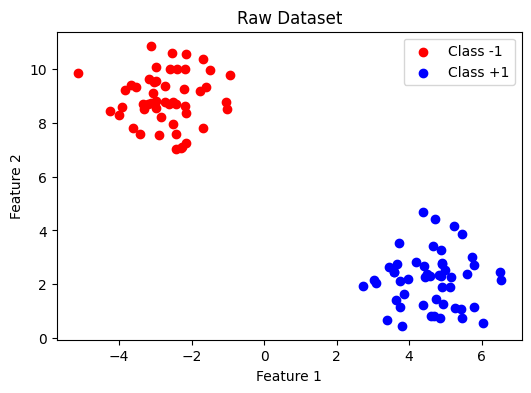

Final Loss: 0.08


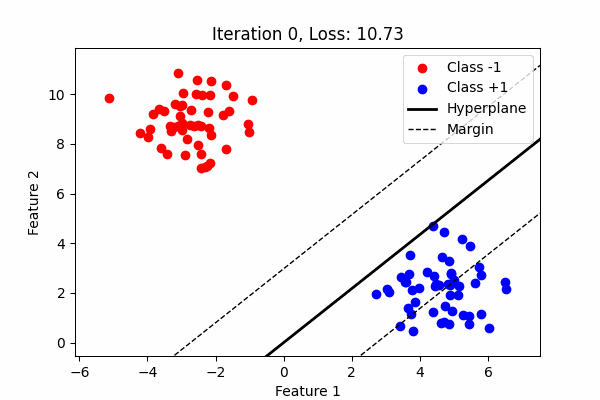

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import tempfile
from IPython.display import display, Image
from sklearn.datasets import make_blobs  # Only used for reproducible data generation

# ===========================================================================
# Step 1: Generate & Save the Dataset (Fixed Random Data)
# ===========================================================================
np.random.seed(42)
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42)
# Convert labels from {0,1} to {-1, +1} for our SVM formulation.
y = np.where(y == 0, -1, 1)
dataset = {"X": X, "y": y}

# ---------------------------------------------------------------------------
# Plot the Raw Dataset (Static Plot)
# ---------------------------------------------------------------------------
plt.figure(figsize=(6, 4))
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class +1')
plt.title("Raw Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# ===========================================================================
# Step 2: Implement SVM Training from Scratch (Subgradient Descent)
# ===========================================================================
def train_svm(X, y, lr=0.001, C=1.0, n_iters=1000, record_every=50):
    """
    Trains a linear SVM using subgradient descent on the hinge loss.
    
    Args:
      X: Feature matrix (n_samples, n_features).
      y: Labels in {-1, 1} (n_samples,).
      lr: Learning rate.
      C: Regularization parameter.
      n_iters: Total iterations.
      record_every: Record parameters every 'record_every' iterations.
    
    Returns:
      w: Learned weight vector.
      b: Learned bias.
      history: List of (iteration, w, b, loss) for visualization.
    """
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0.0
    history = []
    
    for i in range(n_iters):
        # Start with gradient of regularizer
        grad_w = np.copy(w)  # derivative of (1/2)*||w||^2 is w
        grad_b = 0.0
        
        # Compute subgradient from hinge loss
        for j in range(n_samples):
            margin = y[j] * (np.dot(w, X[j]) + b)
            if margin < 1:
                grad_w -= C * y[j] * X[j]
                grad_b -= C * y[j]
        
        # Update parameters
        w = w - lr * grad_w
        b = b - lr * grad_b
        
        # Record state for visualization every 'record_every' iterations
        if i % record_every == 0:
            losses = np.maximum(0, 1 - y * (np.dot(X, w) + b))
            total_loss = 0.5 * np.dot(w, w) + C * np.sum(losses)
            history.append((i, w.copy(), b, total_loss))
    
    return w, b, history

w_opt, b_opt, history = train_svm(dataset["X"], dataset["y"], lr=0.001, C=1.0, n_iters=1000, record_every=50)
print(f"Final Loss: {history[-1][3]:.2f}")

# ===========================================================================
# Step 3: Visualization Function for the Decision Boundary & Margins
# ===========================================================================
def plot_decision_boundary(ax, w, b, x_range):
    """
    Plot the hyperplane (decision boundary) where w^T*x + b = 0
    and the margins where w^T*x + b = ±1.
    """
    if np.abs(w[1]) > 1e-6:
        x_vals = np.array(x_range)
        y_vals = (-w[0] * x_vals - b) / w[1]
        ax.plot(x_vals, y_vals, 'k-', lw=2, label="Hyperplane")
        # Plot margin boundaries
        y_vals_margin1 = (-w[0] * x_vals - b + 1) / w[1]
        y_vals_margin2 = (-w[0] * x_vals - b - 1) / w[1]
        ax.plot(x_vals, y_vals_margin1, 'k--', lw=1, label="Margin")
        ax.plot(x_vals, y_vals_margin2, 'k--', lw=1)
    else:
        # If w[1] is nearly zero, draw vertical lines.
        x_const = -b / w[0]
        ax.axvline(x=x_const, color='k', lw=2)
        ax.axvline(x=(-b + 1) / w[0], color='k', linestyle='--', lw=1)
        ax.axvline(x=(-b - 1) / w[0], color='k', linestyle='--', lw=1)

# ===========================================================================
# Step 4: Animate the Training Process (Evolution of the Decision Boundary)
# ===========================================================================
fig, ax = plt.subplots(figsize=(6, 4))

def update(frame):
    ax.clear()
    iter_num, w, b, loss = history[frame]
    # Plot the data points
    ax.scatter(dataset["X"][dataset["y"] == -1][:, 0], dataset["X"][dataset["y"] == -1][:, 1], 
               color='red', label='Class -1')
    ax.scatter(dataset["X"][dataset["y"] == 1][:, 0], dataset["X"][dataset["y"] == 1][:, 1], 
               color='blue', label='Class +1')
    # Plot the decision boundary and margins
    plot_decision_boundary(ax, w, b, x_range=[dataset["X"][:, 0].min()-1, dataset["X"][:, 0].max()+1])
    ax.set_title(f"Iteration {iter_num}, Loss: {loss:.2f}")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.legend(loc='upper right')
    ax.set_xlim(dataset["X"][:, 0].min()-1, dataset["X"][:, 0].max()+1)
    ax.set_ylim(dataset["X"][:, 1].min()-1, dataset["X"][:, 1].max()+1)

# Create the animation using the recorded history
ani = animation.FuncAnimation(fig, update, frames=len(history), interval=300)

# Save the animation as a GIF using a temporary file
gif_path = tempfile.NamedTemporaryFile(suffix=".gif").name
ani.save(gif_path, writer='pillow', fps=3)
plt.close()  # Close the figure to avoid duplicate output

# Display the animated GIF
display(Image(filename=gif_path))


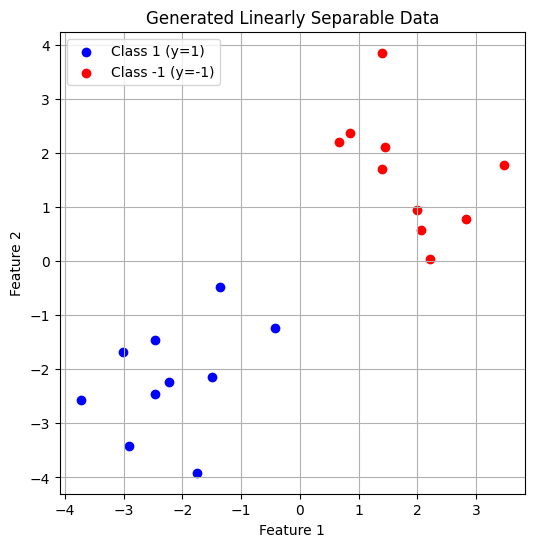

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate class 1 data (blue)
X1 = np.random.randn(10, 2) + np.array([-2, -2])
y1 = np.ones(10)

# Generate class -1 data (red)
X2 = np.random.randn(10, 2) + np.array([2, 2])
y2 = -np.ones(10)

# Combine data
X = np.vstack((X1, X2))
y = np.hstack((y1, y2))

# Plot the data
plt.figure(figsize=(6,6))
plt.scatter(X1[:, 0], X1[:, 1], color="blue", label="Class 1 (y=1)")
plt.scatter(X2[:, 0], X2[:, 1], color="red", label="Class -1 (y=-1)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Generated Linearly Separable Data")
plt.legend()
plt.grid()
plt.show()

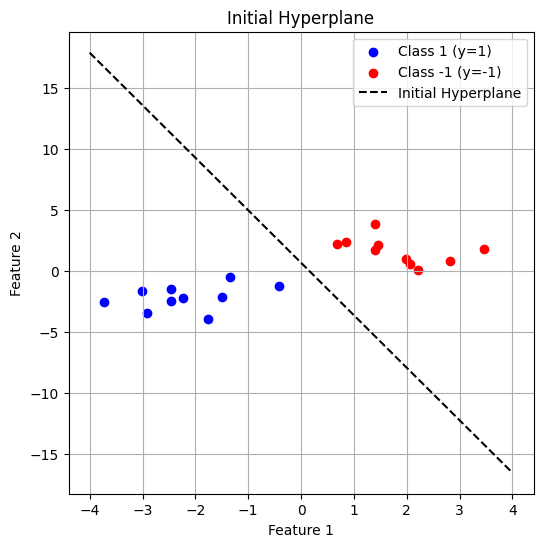

In [59]:
# Initialize parameters
w = np.random.randn(2)  # Random weights
b = np.random.randn()   # Random bias

# Define a function to plot the decision boundary
def plot_hyperplane(w, b, X, y, title):
    plt.figure(figsize=(6,6))
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color="blue", label="Class 1 (y=1)")
    plt.scatter(X[y==-1][:, 0], X[y==-1][:, 1], color="red", label="Class -1 (y=-1)")

    # Decision boundary equation: w1*x1 + w2*x2 + b = 0
    x_values = np.linspace(-4, 4, 100)
    y_values = -(w[0] * x_values + b) / w[1]  # Solve for x2
    
    plt.plot(x_values, y_values, 'k--', label="Initial Hyperplane")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Plot initial decision boundary
plot_hyperplane(w, b, X, y, "Initial Hyperplane")

Initial Hinge Loss: 56.4540


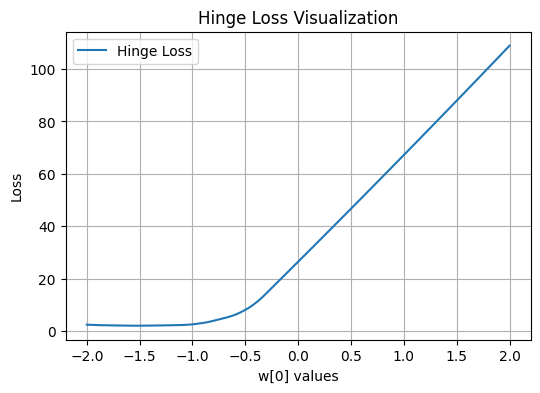

In [60]:
# Define the Hinge Loss function
def hinge_loss(w, b, X, y, C=1):
    n = len(y)
    distances = 1 - y * (np.dot(X, w) + b)  # Compute margins
    loss = np.maximum(0, distances)  # Hinge loss max(0, 1 - y(wx+b))
    return 0.5 * np.dot(w, w) + C * np.sum(loss)  # Regularized loss

# Compute and print the initial loss
initial_loss = hinge_loss(w, b, X, y, C=1)
print(f"Initial Hinge Loss: {initial_loss:.4f}")

# Visualize the loss landscape for one feature (fixing w[1] and varying w[0])
w_range = np.linspace(-2, 2, 100)
loss_values = [hinge_loss(np.array([w_val, w[1]]), b, X, y) for w_val in w_range]

plt.figure(figsize=(6,4))
plt.plot(w_range, loss_values, label="Hinge Loss")
plt.xlabel("w[0] values")
plt.ylabel("Loss")
plt.title("Hinge Loss Visualization")
plt.legend()
plt.grid()
plt.show()

Gradient w: [2.74708765 2.06807066]
Gradient b: 0.0000


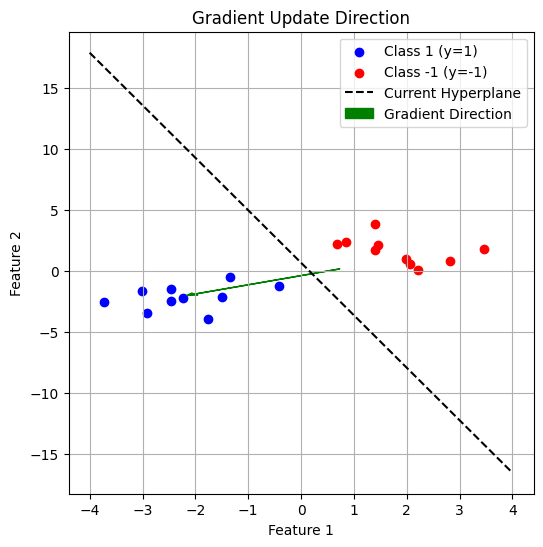

In [61]:
# Compute gradients
C = 1
n = X.shape[0]
gradient_w = np.zeros_like(w)
gradient_b = 0

for i in range(n):
    if y[i] * (np.dot(X[i], w) + b) < 1:
        gradient_w += -y[i] * X[i]  # Gradient update for w
        gradient_b += -y[i]  # Gradient update for b

gradient_w = gradient_w / n + w
gradient_b = gradient_b / n

print(f"Gradient w: {gradient_w}")
print(f"Gradient b: {gradient_b:.4f}")

# Plot the gradient direction
plt.figure(figsize=(6,6))
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color="blue", label="Class 1 (y=1)")
plt.scatter(X[y==-1][:, 0], X[y==-1][:, 1], color="red", label="Class -1 (y=-1)")

x_values = np.linspace(-4, 4, 100)
y_values = -(w[0] * x_values + b) / w[1]
plt.plot(x_values, y_values, 'k--', label="Current Hyperplane")

# Gradient direction arrow
plt.arrow(w[0], w[1], -gradient_w[0], -gradient_w[1], head_width=0.2, head_length=0.2, fc='green', ec='green', label="Gradient Direction")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Gradient Update Direction")
plt.legend()
plt.grid()plt.show()

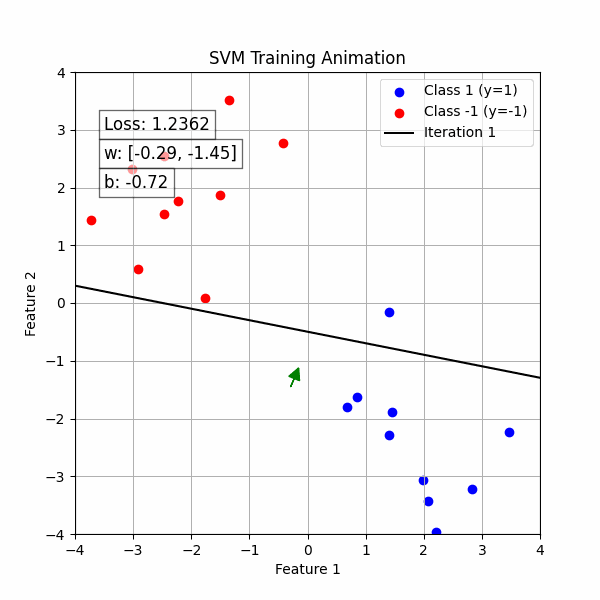

In [71]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import tempfile
from IPython.display import display, Image

# Hyperparameters
eta = 0.01   # Learning rate
C = 1        # Regularization parameter
max_iters = 50  # Maximum iterations
tolerance = 1e-3  # Convergence tolerance

# Store history for animation
history = []

# Training loop
for iteration in range(max_iters):
    gradient_w = np.zeros_like(w)
    gradient_b = 0
    loss = 0

    for i in range(len(y)):
        margin = y[i] * (np.dot(X[i], w) + b)
        if margin < 1:
            gradient_w += -y[i] * X[i]
            gradient_b += -y[i]
        loss += max(0, 1 - margin)

    # Compute final gradients
    gradient_w = gradient_w / len(y) + w
    gradient_b = gradient_b / len(y)
    
    # Update parameters
    w -= eta * gradient_w
    b -= eta * gradient_b

    # Compute current hinge loss
    loss = 0.5 * np.dot(w, w) + C * loss / len(y)

    # Store history (w, b, loss) for animation
    history.append((w.copy(), b, loss, gradient_w.copy(), gradient_b))
    
    # Check for convergence (if gradient is small)
    if np.linalg.norm(gradient_w) < tolerance and abs(gradient_b) < tolerance:
        break

# Set up figure for animation
fig, ax = plt.subplots(figsize=(6,6))
x_values = np.linspace(-4, 4, 100)

# Update function for animation
def update(frame):
    ax.clear()
    w, b, loss, grad_w, grad_b = history[frame]
    
    # Plot data points
    ax.scatter(X[y==1][:, 0], X[y==1][:, 1], color="blue", label="Class 1 (y=1)")
    ax.scatter(X[y==-1][:, 0], X[y==-1][:, 1], color="red", label="Class -1 (y=-1)")

    # Decision boundary
    y_values = -(w[0] * x_values + b) / w[1]
    ax.plot(x_values, y_values, 'k-', label=f"Iteration {frame+1}")
    
    # Display information on the graph
    ax.text(-3.5, 3, f"Loss: {loss:.4f}", fontsize=12, bbox=dict(facecolor='white', alpha=0.6))
    ax.text(-3.5, 2.5, f"w: [{w[0]:.2f}, {w[1]:.2f}]", fontsize=12, bbox=dict(facecolor='white', alpha=0.6))
    ax.text(-3.5, 2, f"b: {b:.2f}", fontsize=12, bbox=dict(facecolor='white', alpha=0.6))
    
    # Gradient direction arrow
    ax.arrow(w[0], w[1], -grad_w[0]*0.1, -grad_w[1]*0.1, head_width=0.2, head_length=0.2, fc='green', ec='green')

    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_title("SVM Training Animation")
    ax.legend()
    ax.grid()

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(history), interval=300)

# Save animation as a GIF
gif_path = tempfile.NamedTemporaryFile(suffix=".gif").name
ani.save(gif_path, writer='pillow', fps=3)
plt.close()  # Close the figure to avoid duplicate output

# Display the animated GIF
display(Image(filename=gif_path))

/var/folders/fz/vv4pwkl920qbrm78wf1yyykr0000gn/T/ipykernel_47449/4290950806.py:51: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))


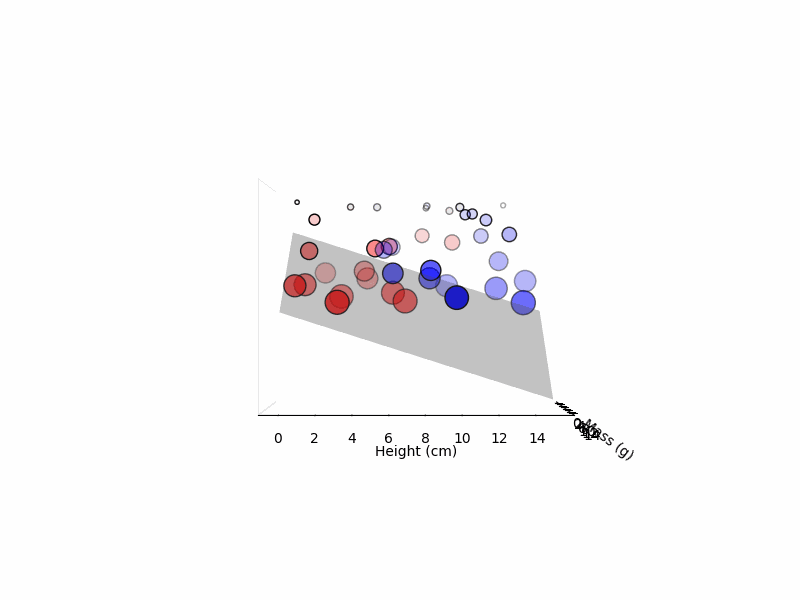

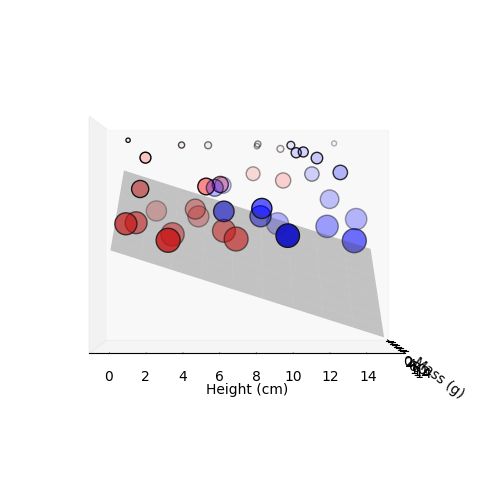

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import tempfile
from IPython import display

# Generate sample data for two classes
np.random.seed(42)
num_points = 20

# Class A (Red)
x_a = np.random.rand(num_points) * 10
y_a = np.random.rand(num_points) * 10
z_a = np.random.rand(num_points) * 10

# Class B (Blue)
x_b = np.random.rand(num_points) * 10 + 5  # Offset to separate groups
y_b = np.random.rand(num_points) * 10 + 5
z_b = np.random.rand(num_points) * 10

# Normalize Z-axis for fading & size effect
z_all = np.concatenate((z_a, z_b))
z_norm = (z_all - min(z_all)) / (max(z_all) - min(z_all))

sizes = 300 * (1 - z_norm)  # Closer points are bigger
alpha_values = 1 - z_norm  # More faded when further

# Colors: Red for Class A, Blue for Class B
colors_a = [(1, 0, 0, alpha_values[i]) for i in range(num_points)]
colors_b = [(0, 0, 1, alpha_values[i + num_points]) for i in range(num_points)]

# Create figure and 3D axis
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc_a = ax.scatter(x_a, y_a, z_a, s=sizes[:num_points], c=colors_a, edgecolors="k", label="Class A")
sc_b = ax.scatter(x_b, y_b, z_b, s=sizes[num_points:], c=colors_b, edgecolors="k", label="Class B")

# Create a decision plane (Example: Z = 7 - 0.5X - 0.5Y)
xx, yy = np.meshgrid(np.linspace(0, 15, 10), np.linspace(0, 15, 10))
zz = 7 - 0.5 * xx - 0.5 * yy
plane = ax.plot_surface(xx, yy, zz, color='gray', alpha=0.3)

# Labels
ax.set_xlabel("Mass (g)")
ax.set_ylabel("Height (cm)")

# Hide Z-axis grid for a cleaner look
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.grid(False)
ax.set_zticks([])

# Animation function
def animate(frame):
    ax.view_init(elev=0, azim=frame * 1)

# Save animation as a GIF
gif_path = tempfile.NamedTemporaryFile(suffix=".gif").name
ani = animation.FuncAnimation(fig, animate, frames=360, interval=50)
ani.save(gif_path, writer='pillow', fps=20)

# Display the GIF in Google Colab
display.display(display.Image(filename=gif_path))


In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Untuk Google Colab

# Fungsi untuk menerapkan blur ringan
def apply_blur(img):
    return cv2.GaussianBlur(img, (5, 5), 0)  # Kernel 5x5 untuk blur ringan

# Fungsi untuk menerapkan sharpening
def apply_sharpening(img, kernel):
    return cv2.filter2D(img, -1, kernel)

# Baca gambar
img = cv2.imread('cat.jpg')  # Ganti dengan path gambar Anda

# Cek jika gambar berhasil dimuat
if img is None:
    print("Gambar tidak ditemukan!")
else:
    # Terapkan blur ringan
    blurred_img = apply_blur(img)

    # Definisi kernel sharpening
    sharpen_kernel = np.array((
        [0, -1,  0],
        [-1, 5, -1],
        [0, -1,  0]
    ), dtype="int")

    # Terapkan filter sharpening setelah blur
    sharpened_img = apply_sharpening(blurred_img, sharpen_kernel)

    # Tampilkan hasil
    cv2_imshow(img)            # Gambar asli
    cv2_imshow(blurred_img)    # Gambar setelah blur ringan
    cv2_imshow(sharpened_img)  # Gambar setelah sharpening

ImportError: cannot import name 'cv2_imshow' from 'cv2' (/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/cv2/__init__.py)

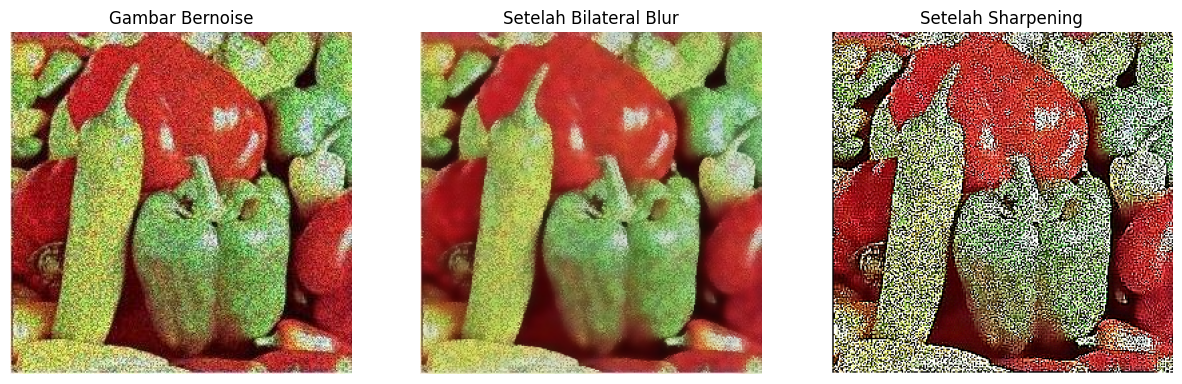

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar yang sudah bernoise
noisy_img = cv2.imread('cc.png')

# Cek jika gambar berhasil dimuat
if noisy_img is None:
    print("Gambar tidak ditemukan!")
else:
    # Konversi BGR ke RGB agar warna benar di Matplotlib
    noisy_img_rgb = cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB)

    # 2. Terapkan Bilateral Filter untuk mengurangi noise tanpa merusak tepi
    blurred_img = cv2.bilateralFilter(noisy_img_rgb, d=9, sigmaColor=100, sigmaSpace=100)

    # 3. Terapkan sharpening untuk mengembalikan detail
    strong_sharpen_kernel = np.array((
        [-1, -1, -1],
        [-1,  9, -1],
        [-1, -1, -1]
    ), dtype="int")

    enhanced_img = cv2.filter2D(blurred_img, -1, strong_sharpen_kernel)

    # 4. Tampilkan hasil sebelum dan sesudah
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].imshow(noisy_img_rgb)
    axs[0].set_title("Gambar Bernoise")
    axs[0].axis("off")

    axs[1].imshow(blurred_img)
    axs[1].set_title("Setelah Bilateral Blur")
    axs[1].axis("off")

    axs[2].imshow(enhanced_img)
    axs[2].set_title("Setelah Sharpening")
    axs[2].axis("off")

    plt.show()